In [1]:
import GetOldTweets3 as got3
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import re
import nltk
import time

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 350)

I will extract top tweets for the past 10 years. 100 top tweets will be extracted each month on the specified topic for past 10 years

In [3]:

def get_tweets(topic, end_date, years=13):
    columns = ['id', 'url', 'author', 'retweets', 'favorites', 'mentions', 'hashtags', 'geo', 'time', 'text']
    text_query = topic
    
    # convert the end_date string to the datetime object
    end_date_datetime = datetime.strptime(end_date, '%Y-%m-%d')

    # This section is to create a list of datetime objects that are 1 month apart going backwards
    date_range = [end_date_datetime]
    total_days = int(365 * years)
    
    prior_date = end_date_datetime
    
    while total_days > 0:
        prior_date = prior_date - relativedelta(days=1)
        date_range.append(prior_date)
        total_days -= 1
        
    # Convert the elements in the list from datetime objects to string
    date_range_string = [twitter_date.strftime('%Y-%m-%d') for twitter_date in date_range][::-1]
    print("Start querying data...")
    
    # Initialize an empty list to store dataframe from each iteration
    compiled_tweets_df = pd.DataFrame(columns=columns)
    
    start_time = time.perf_counter()
    for i in range(len(date_range_string)-1):
        if i==0 or (i > 30 and i%30==1):
            iteration_time = time.perf_counter()
        tweetCriteria = got3.manager\
                .TweetCriteria()\
                .setQuerySearch(text_query)\
                .setLang('en')\
                .setSince(date_range_string[i])\
                .setUntil(date_range_string[i+1])\
                .setTopTweets(True)\
                .setMaxTweets(10)\
                .setEmoji("unicode")

        tweets = got3.manager.TweetManager.getTweets(tweetCriteria)

        text_tweets = [[tweet.id, tweet.permalink, tweet.username, tweet.retweets, 
                tweet.favorites, tweet.mentions, tweet.hashtags, tweet.geo, 
                tweet.date, tweet.text] for tweet in tweets]

        sample_tweets = pd.DataFrame(text_tweets, columns=columns)
        compiled_tweets_df = pd.concat([compiled_tweets_df, sample_tweets])
        print("Query between {} and {} complete!".format(date_range_string[i], date_range_string[i+1]))
        print("Pause the operation...")
        time.sleep(2.5) # pause for 2.5 seconds to avoid server crashing
        print("Begin new iteration...")
        if i!=0 and i%30==0:
            iteration_end_time = time.perf_counter()
            print("Pause time per 30 iterations: {} seconds".format(str(round(iteration_end_time - iteration_time, 2))))
        
    return compiled_tweets_df # concatenate the list of dataframe into a single dataframe
    print("Operation complete!")
    print("Total Runtime: {} seconds!".format(str(round(iteration_end_time - start_time, 2))))
    

In [4]:
tweets = get_tweets("refugee", "2019-12-31", 13)

Start querying data...
Query between 2007-01-03 and 2007-01-04 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-04 and 2007-01-05 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-05 and 2007-01-06 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-06 and 2007-01-07 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-07 and 2007-01-08 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-08 and 2007-01-09 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-09 and 2007-01-10 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-10 and 2007-01-11 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-11 and 2007-01-12 complete!
Pause the operation...
Begin new iteration...
Query between 2007-01-12 and 2007-01-13 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2007-03-29 and 2007-03-30 complete!
Pause the operation...
Begin new iteration...
Query between 2007-03-30 and 2007-03-31 complete!
Pause the operation...
Begin new iteration...
Query between 2007-03-31 and 2007-04-01 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-01 and 2007-04-02 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-02 and 2007-04-03 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-03 and 2007-04-04 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 93.63 seconds
Query between 2007-04-04 and 2007-04-05 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-05 and 2007-04-06 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-06 and 2007-04-07 complete!
Pause the operation...
Begin new iteration...
Query between 2007-04-07 and 2007-04-08 complete!
Pause the operation

Begin new iteration...
Query between 2007-06-21 and 2007-06-22 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-22 and 2007-06-23 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-23 and 2007-06-24 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-24 and 2007-06-25 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-25 and 2007-06-26 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-26 and 2007-06-27 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-27 and 2007-06-28 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-28 and 2007-06-29 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-29 and 2007-06-30 complete!
Pause the operation...
Begin new iteration...
Query between 2007-06-30 and 2007-07-01 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2007-09-13 and 2007-09-14 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-14 and 2007-09-15 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-15 and 2007-09-16 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-16 and 2007-09-17 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-17 and 2007-09-18 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-18 and 2007-09-19 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-19 and 2007-09-20 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-20 and 2007-09-21 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-21 and 2007-09-22 complete!
Pause the operation...
Begin new iteration...
Query between 2007-09-22 and 2007-09-23 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2007-12-06 and 2007-12-07 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-07 and 2007-12-08 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-08 and 2007-12-09 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-09 and 2007-12-10 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-10 and 2007-12-11 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-11 and 2007-12-12 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-12 and 2007-12-13 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-13 and 2007-12-14 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-14 and 2007-12-15 complete!
Pause the operation...
Begin new iteration...
Query between 2007-12-15 and 2007-12-16 complete!
Pause the operation...
Begin new iteration...
Query between 200

Query between 2008-02-28 and 2008-02-29 complete!
Pause the operation...
Begin new iteration...
Query between 2008-02-29 and 2008-03-01 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-01 and 2008-03-02 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-02 and 2008-03-03 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-03 and 2008-03-04 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-04 and 2008-03-05 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-05 and 2008-03-06 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-06 and 2008-03-07 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-07 and 2008-03-08 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-08 and 2008-03-09 complete!
Pause the operation...
Begin new iteration...
Query between 2008-03-09 and 2008-03-10 

Begin new iteration...
Query between 2008-05-23 and 2008-05-24 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-24 and 2008-05-25 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-25 and 2008-05-26 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-26 and 2008-05-27 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-27 and 2008-05-28 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 101.62 seconds
Query between 2008-05-28 and 2008-05-29 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-29 and 2008-05-30 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-30 and 2008-05-31 complete!
Pause the operation...
Begin new iteration...
Query between 2008-05-31 and 2008-06-01 complete!
Pause the operation...
Begin new iteration...
Query between 2008-06-01 and 2008-06-02 complete!
Pause the operatio

Begin new iteration...
Query between 2008-08-15 and 2008-08-16 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-16 and 2008-08-17 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-17 and 2008-08-18 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-18 and 2008-08-19 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-19 and 2008-08-20 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-20 and 2008-08-21 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-21 and 2008-08-22 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-22 and 2008-08-23 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-23 and 2008-08-24 complete!
Pause the operation...
Begin new iteration...
Query between 2008-08-24 and 2008-08-25 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2008-11-07 and 2008-11-08 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-08 and 2008-11-09 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-09 and 2008-11-10 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-10 and 2008-11-11 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-11 and 2008-11-12 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-12 and 2008-11-13 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-13 and 2008-11-14 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-14 and 2008-11-15 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-15 and 2008-11-16 complete!
Pause the operation...
Begin new iteration...
Query between 2008-11-16 and 2008-11-17 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2009-01-30 and 2009-01-31 complete!
Pause the operation...
Begin new iteration...
Query between 2009-01-31 and 2009-02-01 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-01 and 2009-02-02 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-02 and 2009-02-03 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-03 and 2009-02-04 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-04 and 2009-02-05 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-05 and 2009-02-06 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-06 and 2009-02-07 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-07 and 2009-02-08 complete!
Pause the operation...
Begin new iteration...
Query between 2009-02-08 and 2009-02-09 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2009-04-24 and 2009-04-25 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-25 and 2009-04-26 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-26 and 2009-04-27 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-27 and 2009-04-28 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-28 and 2009-04-29 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-29 and 2009-04-30 complete!
Pause the operation...
Begin new iteration...
Query between 2009-04-30 and 2009-05-01 complete!
Pause the operation...
Begin new iteration...
Query between 2009-05-01 and 2009-05-02 complete!
Pause the operation...
Begin new iteration...
Query between 2009-05-02 and 2009-05-03 complete!
Pause the operation...
Begin new iteration...
Query between 2009-05-03 and 2009-05-04 complete!
Pause the operation...
Begin new iteration...
Query between 200

Begin new iteration...
Query between 2009-07-18 and 2009-07-19 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-19 and 2009-07-20 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-20 and 2009-07-21 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-21 and 2009-07-22 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 100.56 seconds
Query between 2009-07-22 and 2009-07-23 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-23 and 2009-07-24 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-24 and 2009-07-25 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-25 and 2009-07-26 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-26 and 2009-07-27 complete!
Pause the operation...
Begin new iteration...
Query between 2009-07-27 and 2009-07-28 complete!
Pause the operatio

Begin new iteration...
Query between 2009-10-10 and 2009-10-11 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-11 and 2009-10-12 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-12 and 2009-10-13 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-13 and 2009-10-14 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-14 and 2009-10-15 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-15 and 2009-10-16 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-16 and 2009-10-17 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-17 and 2009-10-18 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-18 and 2009-10-19 complete!
Pause the operation...
Begin new iteration...
Query between 2009-10-19 and 2009-10-20 complete!
Pause the operation...
Begin new iteration...
Pause time per 30

Begin new iteration...
Query between 2010-01-02 and 2010-01-03 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-03 and 2010-01-04 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-04 and 2010-01-05 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-05 and 2010-01-06 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-06 and 2010-01-07 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-07 and 2010-01-08 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-08 and 2010-01-09 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-09 and 2010-01-10 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-10 and 2010-01-11 complete!
Pause the operation...
Begin new iteration...
Query between 2010-01-11 and 2010-01-12 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2010-03-27 and 2010-03-28 complete!
Pause the operation...
Begin new iteration...
Query between 2010-03-28 and 2010-03-29 complete!
Pause the operation...
Begin new iteration...
Query between 2010-03-29 and 2010-03-30 complete!
Pause the operation...
Begin new iteration...
Query between 2010-03-30 and 2010-03-31 complete!
Pause the operation...
Begin new iteration...
Query between 2010-03-31 and 2010-04-01 complete!
Pause the operation...
Begin new iteration...
Query between 2010-04-01 and 2010-04-02 complete!
Pause the operation...
Begin new iteration...
Query between 2010-04-02 and 2010-04-03 complete!
Pause the operation...
Begin new iteration...
Query between 2010-04-03 and 2010-04-04 complete!
Pause the operation...
Begin new iteration...
Query between 2010-04-04 and 2010-04-05 complete!
Pause the operation...
Begin new iteration...
Query between 2010-04-05 and 2010-04-06 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2010-06-19 and 2010-06-20 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-20 and 2010-06-21 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-21 and 2010-06-22 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-22 and 2010-06-23 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-23 and 2010-06-24 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-24 and 2010-06-25 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-25 and 2010-06-26 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-26 and 2010-06-27 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-27 and 2010-06-28 complete!
Pause the operation...
Begin new iteration...
Query between 2010-06-28 and 2010-06-29 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2010-09-12 and 2010-09-13 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-13 and 2010-09-14 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-14 and 2010-09-15 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 103.1 seconds
Query between 2010-09-15 and 2010-09-16 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-16 and 2010-09-17 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-17 and 2010-09-18 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-18 and 2010-09-19 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-19 and 2010-09-20 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-20 and 2010-09-21 complete!
Pause the operation...
Begin new iteration...
Query between 2010-09-21 and 2010-09-22 complete!
Pause the operation

Begin new iteration...
Query between 2010-12-05 and 2010-12-06 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-06 and 2010-12-07 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-07 and 2010-12-08 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-08 and 2010-12-09 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-09 and 2010-12-10 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-10 and 2010-12-11 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-11 and 2010-12-12 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-12 and 2010-12-13 complete!
Pause the operation...
Begin new iteration...
Query between 2010-12-13 and 2010-12-14 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 102.94 seconds
Query between 2010-12-14 and 2010-12-15 complete!
Pause the operatio

Begin new iteration...
Query between 2011-02-27 and 2011-02-28 complete!
Pause the operation...
Begin new iteration...
Query between 2011-02-28 and 2011-03-01 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-01 and 2011-03-02 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-02 and 2011-03-03 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-03 and 2011-03-04 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-04 and 2011-03-05 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-05 and 2011-03-06 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-06 and 2011-03-07 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-07 and 2011-03-08 complete!
Pause the operation...
Begin new iteration...
Query between 2011-03-08 and 2011-03-09 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2011-05-22 and 2011-05-23 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-23 and 2011-05-24 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-24 and 2011-05-25 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-25 and 2011-05-26 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-26 and 2011-05-27 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-27 and 2011-05-28 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-28 and 2011-05-29 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-29 and 2011-05-30 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-30 and 2011-05-31 complete!
Pause the operation...
Begin new iteration...
Query between 2011-05-31 and 2011-06-01 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2011-08-14 and 2011-08-15 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-15 and 2011-08-16 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-16 and 2011-08-17 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-17 and 2011-08-18 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-18 and 2011-08-19 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-19 and 2011-08-20 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-20 and 2011-08-21 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-21 and 2011-08-22 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-22 and 2011-08-23 complete!
Pause the operation...
Begin new iteration...
Query between 2011-08-23 and 2011-08-24 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2011-11-07 and 2011-11-08 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-08 and 2011-11-09 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 104.09 seconds
Query between 2011-11-09 and 2011-11-10 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-10 and 2011-11-11 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-11 and 2011-11-12 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-12 and 2011-11-13 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-13 and 2011-11-14 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-14 and 2011-11-15 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-15 and 2011-11-16 complete!
Pause the operation...
Begin new iteration...
Query between 2011-11-16 and 2011-11-17 complete!
Pause the operatio

Begin new iteration...
Query between 2012-01-30 and 2012-01-31 complete!
Pause the operation...
Begin new iteration...
Query between 2012-01-31 and 2012-02-01 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-01 and 2012-02-02 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-02 and 2012-02-03 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-03 and 2012-02-04 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-04 and 2012-02-05 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-05 and 2012-02-06 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-06 and 2012-02-07 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 103.28 seconds
Query between 2012-02-07 and 2012-02-08 complete!
Pause the operation...
Begin new iteration...
Query between 2012-02-08 and 2012-02-09 complete!
Pause the operatio

Begin new iteration...
Query between 2012-04-23 and 2012-04-24 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-24 and 2012-04-25 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-25 and 2012-04-26 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-26 and 2012-04-27 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-27 and 2012-04-28 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-28 and 2012-04-29 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-29 and 2012-04-30 complete!
Pause the operation...
Begin new iteration...
Query between 2012-04-30 and 2012-05-01 complete!
Pause the operation...
Begin new iteration...
Query between 2012-05-01 and 2012-05-02 complete!
Pause the operation...
Begin new iteration...
Query between 2012-05-02 and 2012-05-03 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2012-07-16 and 2012-07-17 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-17 and 2012-07-18 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-18 and 2012-07-19 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-19 and 2012-07-20 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-20 and 2012-07-21 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-21 and 2012-07-22 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-22 and 2012-07-23 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-23 and 2012-07-24 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-24 and 2012-07-25 complete!
Pause the operation...
Begin new iteration...
Query between 2012-07-25 and 2012-07-26 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2012-10-08 and 2012-10-09 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-09 and 2012-10-10 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-10 and 2012-10-11 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-11 and 2012-10-12 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-12 and 2012-10-13 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-13 and 2012-10-14 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-14 and 2012-10-15 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-15 and 2012-10-16 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-16 and 2012-10-17 complete!
Pause the operation...
Begin new iteration...
Query between 2012-10-17 and 2012-10-18 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2013-01-01 and 2013-01-02 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 103.9 seconds
Query between 2013-01-02 and 2013-01-03 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-03 and 2013-01-04 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-04 and 2013-01-05 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-05 and 2013-01-06 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-06 and 2013-01-07 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-07 and 2013-01-08 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-08 and 2013-01-09 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-09 and 2013-01-10 complete!
Pause the operation...
Begin new iteration...
Query between 2013-01-10 and 2013-01-11 complete!
Pause the operation

Begin new iteration...
Query between 2013-03-26 and 2013-03-27 complete!
Pause the operation...
Begin new iteration...
Query between 2013-03-27 and 2013-03-28 complete!
Pause the operation...
Begin new iteration...
Query between 2013-03-28 and 2013-03-29 complete!
Pause the operation...
Begin new iteration...
Query between 2013-03-29 and 2013-03-30 complete!
Pause the operation...
Begin new iteration...
Query between 2013-03-30 and 2013-03-31 complete!
Pause the operation...
Begin new iteration...
Query between 2013-03-31 and 2013-04-01 complete!
Pause the operation...
Begin new iteration...
Query between 2013-04-01 and 2013-04-02 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 105.09 seconds
Query between 2013-04-02 and 2013-04-03 complete!
Pause the operation...
Begin new iteration...
Query between 2013-04-03 and 2013-04-04 complete!
Pause the operation...
Begin new iteration...
Query between 2013-04-04 and 2013-04-05 complete!
Pause the operatio

Begin new iteration...
Query between 2013-06-18 and 2013-06-19 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-19 and 2013-06-20 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-20 and 2013-06-21 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-21 and 2013-06-22 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-22 and 2013-06-23 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-23 and 2013-06-24 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-24 and 2013-06-25 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-25 and 2013-06-26 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-26 and 2013-06-27 complete!
Pause the operation...
Begin new iteration...
Query between 2013-06-27 and 2013-06-28 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2013-09-10 and 2013-09-11 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-11 and 2013-09-12 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-12 and 2013-09-13 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-13 and 2013-09-14 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-14 and 2013-09-15 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-15 and 2013-09-16 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-16 and 2013-09-17 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-17 and 2013-09-18 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-18 and 2013-09-19 complete!
Pause the operation...
Begin new iteration...
Query between 2013-09-19 and 2013-09-20 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2013-12-03 and 2013-12-04 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-04 and 2013-12-05 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-05 and 2013-12-06 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-06 and 2013-12-07 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-07 and 2013-12-08 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-08 and 2013-12-09 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-09 and 2013-12-10 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-10 and 2013-12-11 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-11 and 2013-12-12 complete!
Pause the operation...
Begin new iteration...
Query between 2013-12-12 and 2013-12-13 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Pause time per 30 iterations: 103.52 seconds
Query between 2014-02-26 and 2014-02-27 complete!
Pause the operation...
Begin new iteration...
Query between 2014-02-27 and 2014-02-28 complete!
Pause the operation...
Begin new iteration...
Query between 2014-02-28 and 2014-03-01 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-01 and 2014-03-02 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-02 and 2014-03-03 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-03 and 2014-03-04 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-04 and 2014-03-05 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-05 and 2014-03-06 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-06 and 2014-03-07 complete!
Pause the operation...
Begin new iteration...
Query between 2014-03-07 and 2014-03-08 complete!
Pause the operatio

Begin new iteration...
Query between 2014-05-21 and 2014-05-22 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-22 and 2014-05-23 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-23 and 2014-05-24 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-24 and 2014-05-25 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-25 and 2014-05-26 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-26 and 2014-05-27 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 103.43 seconds
Query between 2014-05-27 and 2014-05-28 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-28 and 2014-05-29 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-29 and 2014-05-30 complete!
Pause the operation...
Begin new iteration...
Query between 2014-05-30 and 2014-05-31 complete!
Pause the operatio

Begin new iteration...
Query between 2014-08-13 and 2014-08-14 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-14 and 2014-08-15 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-15 and 2014-08-16 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-16 and 2014-08-17 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-17 and 2014-08-18 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-18 and 2014-08-19 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-19 and 2014-08-20 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-20 and 2014-08-21 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-21 and 2014-08-22 complete!
Pause the operation...
Begin new iteration...
Query between 2014-08-22 and 2014-08-23 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2014-11-05 and 2014-11-06 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-06 and 2014-11-07 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-07 and 2014-11-08 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-08 and 2014-11-09 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-09 and 2014-11-10 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-10 and 2014-11-11 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-11 and 2014-11-12 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-12 and 2014-11-13 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-13 and 2014-11-14 complete!
Pause the operation...
Begin new iteration...
Query between 2014-11-14 and 2014-11-15 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2015-01-28 and 2015-01-29 complete!
Pause the operation...
Begin new iteration...
Query between 2015-01-29 and 2015-01-30 complete!
Pause the operation...
Begin new iteration...
Query between 2015-01-30 and 2015-01-31 complete!
Pause the operation...
Begin new iteration...
Query between 2015-01-31 and 2015-02-01 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-01 and 2015-02-02 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-02 and 2015-02-03 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-03 and 2015-02-04 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-04 and 2015-02-05 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-05 and 2015-02-06 complete!
Pause the operation...
Begin new iteration...
Query between 2015-02-06 and 2015-02-07 complete!
Pause the operation...
Begin new iteration...
Query between 201

Query between 2015-04-22 and 2015-04-23 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-23 and 2015-04-24 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-24 and 2015-04-25 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-25 and 2015-04-26 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-26 and 2015-04-27 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-27 and 2015-04-28 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-28 and 2015-04-29 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-29 and 2015-04-30 complete!
Pause the operation...
Begin new iteration...
Query between 2015-04-30 and 2015-05-01 complete!
Pause the operation...
Begin new iteration...
Query between 2015-05-01 and 2015-05-02 complete!
Pause the operation...
Begin new iteration...
Query between 2015-05-02 and 2015-05-03 

Begin new iteration...
Query between 2015-07-16 and 2015-07-17 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-17 and 2015-07-18 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-18 and 2015-07-19 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-19 and 2015-07-20 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-20 and 2015-07-21 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 105.77 seconds
Query between 2015-07-21 and 2015-07-22 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-22 and 2015-07-23 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-23 and 2015-07-24 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-24 and 2015-07-25 complete!
Pause the operation...
Begin new iteration...
Query between 2015-07-25 and 2015-07-26 complete!
Pause the operatio

Begin new iteration...
Query between 2015-10-08 and 2015-10-09 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-09 and 2015-10-10 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-10 and 2015-10-11 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-11 and 2015-10-12 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-12 and 2015-10-13 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-13 and 2015-10-14 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-14 and 2015-10-15 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-15 and 2015-10-16 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-16 and 2015-10-17 complete!
Pause the operation...
Begin new iteration...
Query between 2015-10-17 and 2015-10-18 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2015-12-31 and 2016-01-01 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-01 and 2016-01-02 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-02 and 2016-01-03 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-03 and 2016-01-04 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-04 and 2016-01-05 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-05 and 2016-01-06 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-06 and 2016-01-07 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-07 and 2016-01-08 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-08 and 2016-01-09 complete!
Pause the operation...
Begin new iteration...
Query between 2016-01-09 and 2016-01-10 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2016-03-24 and 2016-03-25 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-25 and 2016-03-26 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-26 and 2016-03-27 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-27 and 2016-03-28 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-28 and 2016-03-29 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-29 and 2016-03-30 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-30 and 2016-03-31 complete!
Pause the operation...
Begin new iteration...
Query between 2016-03-31 and 2016-04-01 complete!
Pause the operation...
Begin new iteration...
Query between 2016-04-01 and 2016-04-02 complete!
Pause the operation...
Begin new iteration...
Query between 2016-04-02 and 2016-04-03 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2016-06-16 and 2016-06-17 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-17 and 2016-06-18 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-18 and 2016-06-19 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-19 and 2016-06-20 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-20 and 2016-06-21 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-21 and 2016-06-22 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-22 and 2016-06-23 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-23 and 2016-06-24 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-24 and 2016-06-25 complete!
Pause the operation...
Begin new iteration...
Query between 2016-06-25 and 2016-06-26 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2016-09-09 and 2016-09-10 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-10 and 2016-09-11 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-11 and 2016-09-12 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-12 and 2016-09-13 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 106.11 seconds
Query between 2016-09-13 and 2016-09-14 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-14 and 2016-09-15 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-15 and 2016-09-16 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-16 and 2016-09-17 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-17 and 2016-09-18 complete!
Pause the operation...
Begin new iteration...
Query between 2016-09-18 and 2016-09-19 complete!
Pause the operatio

Begin new iteration...
Query between 2016-12-02 and 2016-12-03 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-03 and 2016-12-04 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-04 and 2016-12-05 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-05 and 2016-12-06 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-06 and 2016-12-07 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-07 and 2016-12-08 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-08 and 2016-12-09 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-09 and 2016-12-10 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-10 and 2016-12-11 complete!
Pause the operation...
Begin new iteration...
Query between 2016-12-11 and 2016-12-12 complete!
Pause the operation...
Begin new iteration...
Pause time per 30

Begin new iteration...
Query between 2017-02-24 and 2017-02-25 complete!
Pause the operation...
Begin new iteration...
Query between 2017-02-25 and 2017-02-26 complete!
Pause the operation...
Begin new iteration...
Query between 2017-02-26 and 2017-02-27 complete!
Pause the operation...
Begin new iteration...
Query between 2017-02-27 and 2017-02-28 complete!
Pause the operation...
Begin new iteration...
Query between 2017-02-28 and 2017-03-01 complete!
Pause the operation...
Begin new iteration...
Query between 2017-03-01 and 2017-03-02 complete!
Pause the operation...
Begin new iteration...
Query between 2017-03-02 and 2017-03-03 complete!
Pause the operation...
Begin new iteration...
Query between 2017-03-03 and 2017-03-04 complete!
Pause the operation...
Begin new iteration...
Query between 2017-03-04 and 2017-03-05 complete!
Pause the operation...
Begin new iteration...
Query between 2017-03-05 and 2017-03-06 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2017-05-19 and 2017-05-20 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-20 and 2017-05-21 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-21 and 2017-05-22 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-22 and 2017-05-23 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-23 and 2017-05-24 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-24 and 2017-05-25 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-25 and 2017-05-26 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-26 and 2017-05-27 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-27 and 2017-05-28 complete!
Pause the operation...
Begin new iteration...
Query between 2017-05-28 and 2017-05-29 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2017-08-11 and 2017-08-12 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-12 and 2017-08-13 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-13 and 2017-08-14 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-14 and 2017-08-15 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-15 and 2017-08-16 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-16 and 2017-08-17 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-17 and 2017-08-18 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-18 and 2017-08-19 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-19 and 2017-08-20 complete!
Pause the operation...
Begin new iteration...
Query between 2017-08-20 and 2017-08-21 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2017-11-04 and 2017-11-05 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-05 and 2017-11-06 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-06 and 2017-11-07 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 105.29 seconds
Query between 2017-11-07 and 2017-11-08 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-08 and 2017-11-09 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-09 and 2017-11-10 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-10 and 2017-11-11 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-11 and 2017-11-12 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-12 and 2017-11-13 complete!
Pause the operation...
Begin new iteration...
Query between 2017-11-13 and 2017-11-14 complete!
Pause the operatio

Begin new iteration...
Query between 2018-01-27 and 2018-01-28 complete!
Pause the operation...
Begin new iteration...
Query between 2018-01-28 and 2018-01-29 complete!
Pause the operation...
Begin new iteration...
Query between 2018-01-29 and 2018-01-30 complete!
Pause the operation...
Begin new iteration...
Query between 2018-01-30 and 2018-01-31 complete!
Pause the operation...
Begin new iteration...
Query between 2018-01-31 and 2018-02-01 complete!
Pause the operation...
Begin new iteration...
Query between 2018-02-01 and 2018-02-02 complete!
Pause the operation...
Begin new iteration...
Query between 2018-02-02 and 2018-02-03 complete!
Pause the operation...
Begin new iteration...
Query between 2018-02-03 and 2018-02-04 complete!
Pause the operation...
Begin new iteration...
Query between 2018-02-04 and 2018-02-05 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 106.09 seconds
Query between 2018-02-05 and 2018-02-06 complete!
Pause the operatio

Begin new iteration...
Query between 2018-04-21 and 2018-04-22 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-22 and 2018-04-23 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-23 and 2018-04-24 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-24 and 2018-04-25 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-25 and 2018-04-26 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-26 and 2018-04-27 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-27 and 2018-04-28 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-28 and 2018-04-29 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-29 and 2018-04-30 complete!
Pause the operation...
Begin new iteration...
Query between 2018-04-30 and 2018-05-01 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2018-07-14 and 2018-07-15 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-15 and 2018-07-16 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-16 and 2018-07-17 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-17 and 2018-07-18 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-18 and 2018-07-19 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-19 and 2018-07-20 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-20 and 2018-07-21 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-21 and 2018-07-22 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-22 and 2018-07-23 complete!
Pause the operation...
Begin new iteration...
Query between 2018-07-23 and 2018-07-24 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2018-10-06 and 2018-10-07 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-07 and 2018-10-08 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-08 and 2018-10-09 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-09 and 2018-10-10 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-10 and 2018-10-11 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-11 and 2018-10-12 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-12 and 2018-10-13 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-13 and 2018-10-14 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-14 and 2018-10-15 complete!
Pause the operation...
Begin new iteration...
Query between 2018-10-15 and 2018-10-16 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2018-12-30 and 2018-12-31 complete!
Pause the operation...
Begin new iteration...
Query between 2018-12-31 and 2019-01-01 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 104.32 seconds
Query between 2019-01-01 and 2019-01-02 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-02 and 2019-01-03 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-03 and 2019-01-04 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-04 and 2019-01-05 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-05 and 2019-01-06 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-06 and 2019-01-07 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-07 and 2019-01-08 complete!
Pause the operation...
Begin new iteration...
Query between 2019-01-08 and 2019-01-09 complete!
Pause the operatio

Begin new iteration...
Query between 2019-03-24 and 2019-03-25 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-25 and 2019-03-26 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-26 and 2019-03-27 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-27 and 2019-03-28 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-28 and 2019-03-29 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-29 and 2019-03-30 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-30 and 2019-03-31 complete!
Pause the operation...
Begin new iteration...
Query between 2019-03-31 and 2019-04-01 complete!
Pause the operation...
Begin new iteration...
Pause time per 30 iterations: 106.15 seconds
Query between 2019-04-01 and 2019-04-02 complete!
Pause the operation...
Begin new iteration...
Query between 2019-04-02 and 2019-04-03 complete!
Pause the operatio

Begin new iteration...
Query between 2019-06-16 and 2019-06-17 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-17 and 2019-06-18 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-18 and 2019-06-19 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-19 and 2019-06-20 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-20 and 2019-06-21 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-21 and 2019-06-22 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-22 and 2019-06-23 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-23 and 2019-06-24 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-24 and 2019-06-25 complete!
Pause the operation...
Begin new iteration...
Query between 2019-06-25 and 2019-06-26 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2019-09-08 and 2019-09-09 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-09 and 2019-09-10 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-10 and 2019-09-11 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-11 and 2019-09-12 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-12 and 2019-09-13 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-13 and 2019-09-14 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-14 and 2019-09-15 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-15 and 2019-09-16 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-16 and 2019-09-17 complete!
Pause the operation...
Begin new iteration...
Query between 2019-09-17 and 2019-09-18 complete!
Pause the operation...
Begin new iteration...
Query between 201

Begin new iteration...
Query between 2019-12-01 and 2019-12-02 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-02 and 2019-12-03 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-03 and 2019-12-04 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-04 and 2019-12-05 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-05 and 2019-12-06 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-06 and 2019-12-07 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-07 and 2019-12-08 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-08 and 2019-12-09 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-09 and 2019-12-10 complete!
Pause the operation...
Begin new iteration...
Query between 2019-12-10 and 2019-12-11 complete!
Pause the operation...
Begin new iteration...
Query between 201

In [5]:
tweets.index = range(len(tweets))

In [8]:
tweets.head()

,id,url,author,retweets,favorites,mentions,hashtags,geo,time,text
0,2710633,https://twitter.com/Hybernaut/status/2710633,Hybernaut,0,0,,,,2007-01-12 14:42:39+00:00,"Finally, after a month as corporate refugee, b..."
1,2776453,https://twitter.com/BBCNews/status/2776453,BBCNews,0,0,,,,2007-01-13 12:10:51+00:00,A demonstration takes place in Glasgow calling...
2,2771263,https://twitter.com/BBCScotland/status/2771263,BBCScotland,0,0,,,,2007-01-13 09:40:58+00:00,A demonstration is set to take place in Glasgo...
3,4213843,https://twitter.com/buzz/status/4213843,buzz,0,0,,,,2007-01-26 17:36:12+00:00,Watching a Hurricane Katrina documentary befor...
4,5356257,https://twitter.com/BBCWorld/status/5356257,BBCWorld,0,0,,,,2007-02-07 18:30:42+00:00,Pakistan announces it will close four Afghan r...


In [7]:
tweets["text"][1]

'A demonstration takes place in Glasgow calling for the release of a Ugandan refugee and her children. http://tinyurl.com/y3auy7'

In [9]:
# I will create a copy of the tweets dataframe and work on the copy
tweets_modify = tweets.copy()

In [11]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # remove url
    text = text.lower() # convert text to lower case
    text = re.sub(r'[^\x00-\x7F]+',' ', text) # replace the non-ASCII characters with space
    text = re.sub('#', '', text) # removing the hashtag sign
    text = re.sub(r'[^\w\s]', '', text) # remove punctuations

    return text
    

In [12]:
tweets_modify["text"] = tweets_modify["text"].apply(clean_text)

In [14]:
tweets_modify["text"][20]

'indians are in bangladeshs cricket refugee camp'

In [15]:
tweets_modify.head()

,id,url,author,retweets,favorites,mentions,hashtags,geo,time,text
0,2710633,https://twitter.com/Hybernaut/status/2710633,Hybernaut,0,0,,,,2007-01-12 14:42:39+00:00,finally after a month as corporate refugee bac...
1,2776453,https://twitter.com/BBCNews/status/2776453,BBCNews,0,0,,,,2007-01-13 12:10:51+00:00,a demonstration takes place in glasgow calling...
2,2771263,https://twitter.com/BBCScotland/status/2771263,BBCScotland,0,0,,,,2007-01-13 09:40:58+00:00,a demonstration is set to take place in glasgo...
3,4213843,https://twitter.com/buzz/status/4213843,buzz,0,0,,,,2007-01-26 17:36:12+00:00,watching a hurricane katrina documentary befor...
4,5356257,https://twitter.com/BBCWorld/status/5356257,BBCWorld,0,0,,,,2007-02-07 18:30:42+00:00,pakistan announces it will close four afghan r...


In [16]:
# For summary statistics, we will calculate the word count for each tweet
tweets_modify["word_counts"] = tweets_modify.text.apply(lambda x: len(x.split()))

In [18]:
# We will first see how many tweets on immigration are there in the dataset per year
tweets_num_per_year = {}
for year in range(tweets_modify["time"].dt.year.min(), tweets_modify["time"].dt.year.max()+1):
    tweets_num_per_year[year] = len(tweets_modify[tweets_modify["time"].dt.year == year])

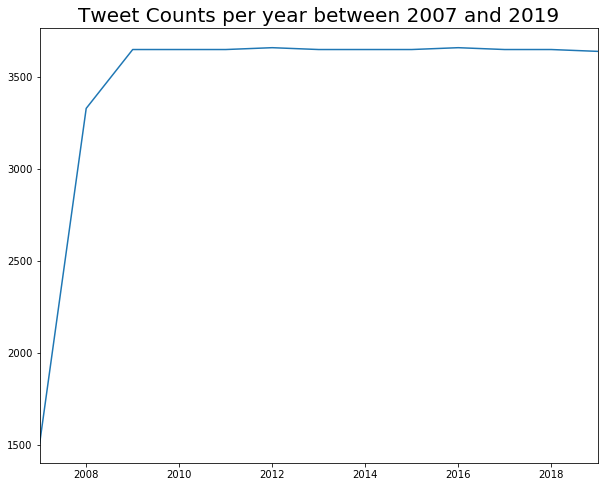

In [19]:
pd.Series(tweets_num_per_year).plot(figsize=(10, 8))
plt.title("Tweet Counts per year between 2007 and 2019", size=20)
plt.savefig("Tweet Counts per year between 2007 and 2019.png")
plt.show()

In [20]:
# Now we will see how many retweets there are on the topic of immigration in our dataset
retweet_num_per_year = {}
for year in range(tweets_modify["time"].dt.year.min(), tweets_modify["time"].dt.year.max()+1):
    retweet_num_per_year[year] = tweets_modify[tweets_modify["time"].dt.year == year].retweets.sum()

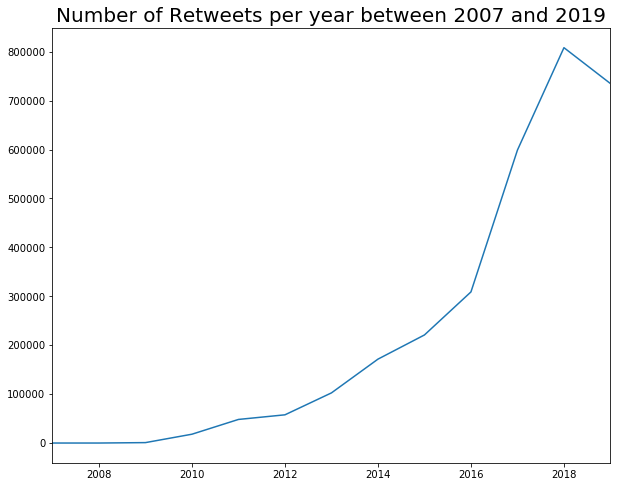

In [21]:
pd.Series(retweet_num_per_year).plot(figsize=(10, 8))
plt.title("Number of Retweets per year between 2007 and 2019", size=20)
plt.savefig("retweet_num.png")
plt.show()

In [22]:
# let's now the count the aggregated number of favorites per year
fav_num_per_year = {}
for year in range(tweets_modify["time"].dt.year.min(), tweets_modify["time"].dt.year.max()+1):
    fav_num_per_year[year] = tweets_modify[tweets_modify["time"].dt.year == year].favorites.sum()

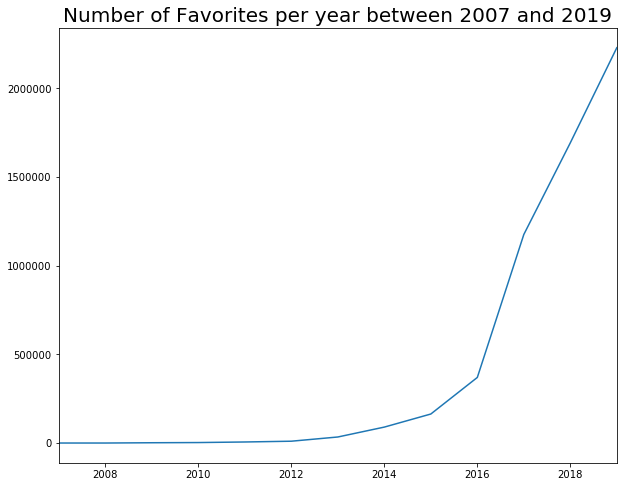

In [23]:
pd.Series(fav_num_per_year).plot(figsize=(10, 8))
plt.title("Number of Favorites per year between 2007 and 2019", size=20)
plt.savefig("favorites_num.png")
plt.show()

In [25]:
# Lastly, let's look at the number of unique authors every year for the twitter data
unique_author_num_per_year = {}
for year in range(tweets_modify["time"].dt.year.min(), tweets_modify["time"].dt.year.max()+1):
    unique_author_num_per_year[year] = len(tweets_modify[tweets_modify["time"].dt.year == year].author.unique())

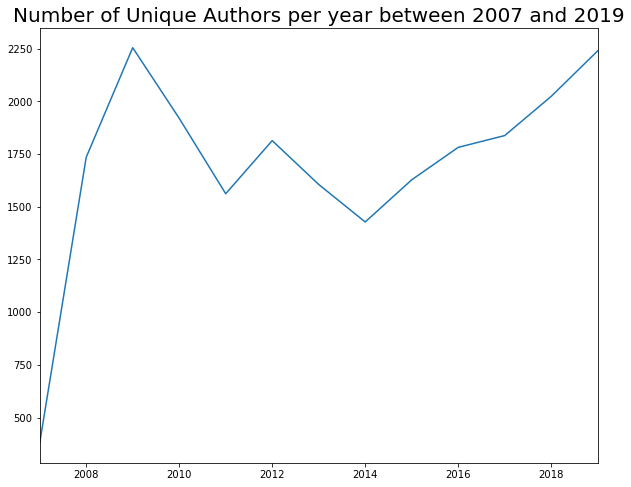

In [26]:
pd.Series(unique_author_num_per_year).plot(figsize=(10, 8))
plt.title("Number of Unique Authors per year between 2007 and 2019", size=20)
plt.savefig("unique_author_num.png")
plt.show()

##### For the subsequent analyses, I need to keep only part of the tweets dataset so it can be concatenated to the COCA corpus dataset
* Columns to Remain:
    * tweet_id
    * word_count
    * year
    * author
    * genre (twitter)
    * text

In [28]:
# Now we need to keep the year part of the time
tweets_modify["year"] = tweets.time.dt.year

In [30]:
# Add an additional column called "genre"
tweets_modify["genre"] = "twitter"

In [31]:
tweets_modify.head()

,id,url,author,retweets,favorites,mentions,hashtags,geo,time,text,word_counts,year,genre
0,2710633,https://twitter.com/Hybernaut/status/2710633,Hybernaut,0,0,,,,2007-01-12 14:42:39+00:00,finally after a month as corporate refugee bac...,14,2007,twitter
1,2776453,https://twitter.com/BBCNews/status/2776453,BBCNews,0,0,,,,2007-01-13 12:10:51+00:00,a demonstration takes place in glasgow calling...,17,2007,twitter
2,2771263,https://twitter.com/BBCScotland/status/2771263,BBCScotland,0,0,,,,2007-01-13 09:40:58+00:00,a demonstration is set to take place in glasgo...,20,2007,twitter
3,4213843,https://twitter.com/buzz/status/4213843,buzz,0,0,,,,2007-01-26 17:36:12+00:00,watching a hurricane katrina documentary befor...,15,2007,twitter
4,5356257,https://twitter.com/BBCWorld/status/5356257,BBCWorld,0,0,,,,2007-02-07 18:30:42+00:00,pakistan announces it will close four afghan r...,18,2007,twitter


In [34]:
# Now let's trime the tweets dataset so it fits with the COCA corpus
tweets_trimmed = tweets_modify[["id", "word_counts", "year", "author", "genre", "text"]]

In [35]:
tweets_trimmed.head()

,id,word_counts,year,author,genre,text
0,2710633,14,2007,Hybernaut,twitter,finally after a month as corporate refugee bac...
1,2776453,17,2007,BBCNews,twitter,a demonstration takes place in glasgow calling...
2,2771263,20,2007,BBCScotland,twitter,a demonstration is set to take place in glasgo...
3,4213843,15,2007,buzz,twitter,watching a hurricane katrina documentary befor...
4,5356257,18,2007,BBCWorld,twitter,pakistan announces it will close four afghan r...


In [ ]:
# Let's read the datasets to csv
tweets.to_csv("raw_twitter_data.csv")
tweets_modify.to_csv("cleaned_twitter_data.csv")
tweets_trimmed.to_csv("")